In [6]:
# 独立な2群のt検定
male <- c(6,10,6,10,5,3,5,9,3,3)
female <- c(11,6,11,9,7,5,8,7,7,9)
rbind(male, female)

male,6,10,6,10,5,3,5,9,3,3
female,11,6,11,9,7,5,8,7,7,9


In [13]:
## 帰無仮説は mu1 = mu2、対立仮説は mu1 != mu2
### 2群を pool した分散を求める
size_m <- length(male)
size_f <- length(female)
dfree <- size_m + size_f - 2
var_m <- var(male)
var_f <- var(female)
var_pooled <- ((size_m - 1) * var_m + (size_f - 1) * var_f) / (size_m + size_f - 2)
### 自由度 size_m + size_f - 2 のt分布に従う検定統計量：
t <- (mean(male) - mean(female)) / sqrt(var_pooled * (1 / size_m + 1 / size_f))
t

[1] -1.842885

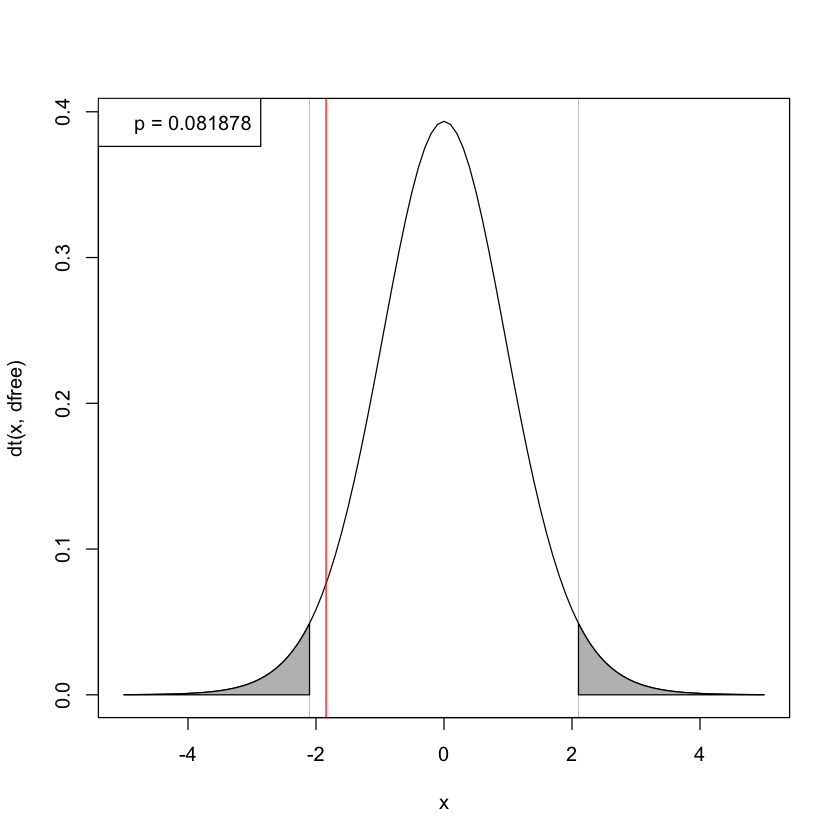

In [17]:
alpha <- 0.05
bottom <- qt(alpha/2, dfree)
top <- qt(1-alpha/2, dfree)
## 描画
curve(dt(x,dfree),-5,5)
abline(v=top,lwd=0.2)
abline(v=bottom,lwd=0.2)
abline(v=t,col="red")
## 棄却域を色付け
xvals <- seq(top, 5, length=1000)
yvals <- dt(xvals,dfree)
polygon(c(xvals,rev(xvals)),c(rep(0,1000),rev(yvals)),col="gray")
xvals <- seq(-5, bottom, length=1000)
yvals <- dt(xvals,dfree)
polygon(c(xvals,rev(xvals)),c(rep(0,1000),rev(yvals)),col="gray")
legend("topleft", legend=sprintf("p = %f",2*pt(t,dfree)), bg="white")

In [20]:
# 分散の等質性の検定
## t検定の前提条件の1つ
var.test(male, female)
## → p = 0.3362 > 0.05 なので、有意水準 0.05 のもとでは母分散は等質であると言って良い


	F test to compare two variances

data:  male and female
F = 1.9444, num df = 9, denom df = 9, p-value = 0.3362
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4829725 7.8283220
sample estimates:
ratio of variances 
          1.944444 


In [22]:
## 母分散が等質ではない例
classA <- c(54,55,52,48,50,38,41,40,53,52)
classB <- c(67,63,50,60,61,69,43,58,36,29)
var.test(classA, classB)


	F test to compare two variances

data:  classA and classB
F = 0.21567, num df = 9, denom df = 9, p-value = 0.03206
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.05356961 0.86828987
sample estimates:
ratio of variances 
         0.2156709 


In [25]:
## 母分散が等質でないときは Welch の検定
t.test(classA, classB, var.equal=FALSE)


	Welch Two Sample t-test

data:  classA and classB
t = -1.1191, df = 12.71, p-value = 0.2838
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15.554888   4.954888
sample estimates:
mean of x mean of y 
     48.3      53.6 


In [30]:
# 対応ありのt検定
test1 <- c(6,10,6,10,5,3,5,9,3,3,11,6,11,9,7,5,8,7,7,9)
test2 <- c(10,13,8,15,8,6,9,10,7,3,18,14,18,11,12,5,7,12,7,7)
rbind(test1, test2)
n <- length(test1)
dfree <- n - 1
t <- mean(test2 - test1) / sqrt(var(test2 - test1) / n)
t

test1,6,10,6,10,5,3,5,9,3,3,11,6,11,9,7,5,8,7,7,9
test2,10,13,8,15,8,6,9,10,7,3,18,14,18,11,12,5,7,12,7,7


[1] 4.839903

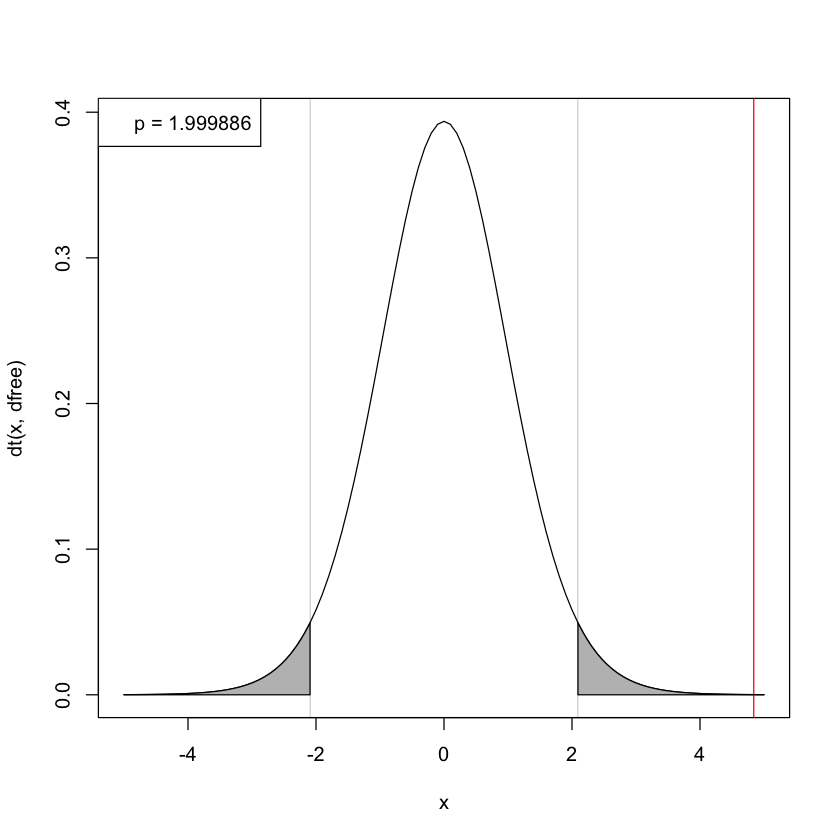

In [32]:
alpha <- 0.05
bottom <- qt(alpha/2, dfree)
top <- qt(1-alpha/2, dfree)
## 描画
curve(dt(x,dfree),-5,5)
abline(v=top,lwd=0.2)
abline(v=bottom,lwd=0.2)
abline(v=t,col="red")
## 棄却域を色付け
xvals <- seq(top, 5, length=1000)
yvals <- dt(xvals,dfree)
polygon(c(xvals,rev(xvals)),c(rep(0,1000),rev(yvals)),col="gray")
xvals <- seq(-5, bottom, length=1000)
yvals <- dt(xvals,dfree)
polygon(c(xvals,rev(xvals)),c(rep(0,1000),rev(yvals)),col="gray")
legend("topleft", legend=sprintf("p = %f",2*pt(t,dfree)), bg="white")

In [34]:
## 対応ありとしたときと対応無しとしたときの結果の違い
### 対応ありのとき
t.test(test1, test2, paired=TRUE)


	Paired t-test

data:  test1 and test2
t = -4.8399, df = 19, p-value = 0.0001138
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.297355 -1.702645
sample estimates:
mean of the differences 
                     -3 


In [35]:
### 対応なしのとき（分散の等質性が満たされないので Welch の検定）
var.test(test1, test2)
t.test(test1, test2, var.equal=FALSE)


	F test to compare two variances

data:  test1 and test2
F = 0.3913, num df = 19, denom df = 19, p-value = 0.04733
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1548830 0.9886112
sample estimates:
ratio of variances 
         0.3913043 



	Welch Two Sample t-test

data:  test1 and test2
t = -2.763, df = 31.895, p-value = 0.009429
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.2119742 -0.7880258
sample estimates:
mean of x mean of y 
        7        10 
